In [32]:
# deep learning computing e.g. self-driving cars and facial recognition! 
%tensorflow_version 2.x  
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [33]:
# load and split the data 
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [34]:
# normalise the pixel values between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

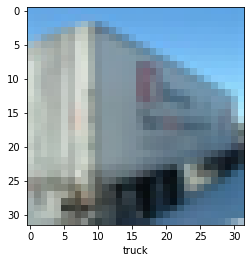

In [38]:
# looking at one image
IMG_INDEX = 15  # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [40]:
# CNN architecture- stacking convolutional layers (convolutional base)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) # defining the amount of filters, sample size, activation function, define the input shape
model.add(layers.MaxPooling2D((2, 2))) # 2x2 sample size
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [41]:
# summary of our model so far 
model.summary() # you will see that there is 2 pixels less in the first section due to a lack of padding 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [44]:
# adding dense layers 
model.add(layers.Flatten()) # flattening pixels 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [47]:
# training 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=4, 
                    validation_data=(test_images, test_labels))

Epoch 1/4
1563/1563 [==============================] - 83s 52ms/step - loss: 1.5265 - accuracy: 0.4436 - val_loss: 1.2914 - val_accuracy: 0.5455
Epoch 2/4
1563/1563 [==============================] - 84s 54ms/step - loss: 1.1569 - accuracy: 0.5908 - val_loss: 1.0929 - val_accuracy: 0.6143
Epoch 3/4
1563/1563 [==============================] - 73s 47ms/step - loss: 1.0226 - accuracy: 0.6396 - val_loss: 0.9626 - val_accuracy: 0.6628
Epoch 4/4
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9275 - accuracy: 0.6737 - val_loss: 0.9392 - val_accuracy: 0.6742


In [49]:
# evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 4s - loss: 0.9392 - accuracy: 0.6742 - 4s/epoch - 12ms/step
0.6741999983787537
